In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from electric_images_dataset import ElectricImagesDataset

import sys
sys.path.append("../../efish-physics-model/objects")
sys.path.append("../../efish-physics-model/helper_functions")
sys.path.append("../../efish-physics-model/uniform_points_generation")

In [3]:
# data_dir_name = "../../efish-physics-model/data/processed/data-2024_06_13-characterization_dataset"
data_dir_name = "../../efish-physics-model/data/processed/data-2024_06_13-characterization_dataset_mockup"
dataset = pd.read_pickle(f"{data_dir_name}/dataset.pkl")
h5py_file = h5py.File(f"{data_dir_name}/responses.hdf5",'r')["responses"]

In [4]:
fish = dataset["fish"]["dataframe"]["objs"][0]
base_stim = dataset["electric_images"]["base"]["responses"][0]
modulation = (h5py_file[780] / base_stim - 1) * 100
modulation[fish.get_receptors_locations()[:,0]< -0.11] = 0

In [5]:
fish.visualize_scatter(intensity=modulation[:,0], show_normals=1, show_point_currents=5, marker_alpha=1)
print()

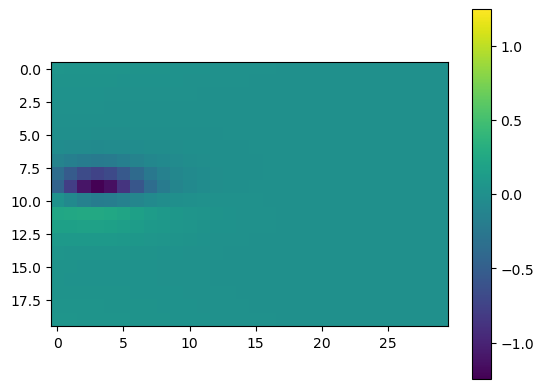

In [6]:
img_data = modulation.reshape(30,20,2).transpose(1,0,2)[:,:,1]
vval = np.max(np.abs(img_data))
plt.imshow(img_data, cmap="viridis", vmin=-vval, vmax=vval)
plt.colorbar()
plt.show()

In [7]:
dset = ElectricImagesDataset(data_dir_name=data_dir_name, fish_t=20, fish_u=30)

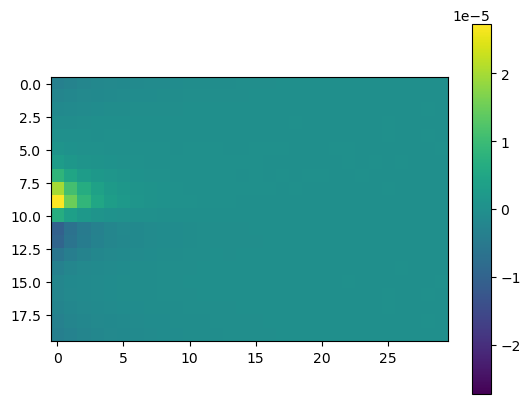

In [10]:
img_data = dset[0][0][:,:,1]
vval = np.max(np.abs(img_data))
plt.imshow(img_data, cmap="viridis", vmin=-vval, vmax=vval)
plt.colorbar()
plt.show()